In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

In [2]:
telco_churn = pd.read_csv('/home/amybirdee/hobby_projects/telco_customer_churn/Telco_Customer_Churn.csv', delimiter = ',')

In [3]:
telco_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
telco_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
#total charges is an object datatype but should be float - converting to float, errors = 'coerce' changes non-numeric values
#to NaN
telco_churn['TotalCharges'] = pd.to_numeric(telco_churn['TotalCharges'], errors = 'coerce')

In [6]:
#removing any NaNs from total charges column
telco_churn['TotalCharges'] = telco_churn['TotalCharges'].replace(np.nan, 0)

In [7]:
telco_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

In [8]:
#don't need the customer id for the model so dropping this
telco_churn = telco_churn.drop('customerID', axis = 1)
telco_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
#target variable is churn - currently this column shows yes/no but it needs to be a binary column to changing to 0/1
telco_churn['Churn'] = telco_churn['Churn'].replace({'Yes': 1, 'No': 0})
telco_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [10]:
#counting how many 0s and 1s we have in churn column - 5174 customers didn't churn and 1869 did
print(telco_churn.Churn.value_counts())

0    5174
1    1869
Name: Churn, dtype: int64


In [11]:
#creating dummy values for all categorical variables to use in model
telco_dummy = pd.get_dummies(telco_churn)
telco_dummy.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [12]:
telco_dummy.dtypes

SeniorCitizen                                int64
tenure                                       int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
gender_Female                                uint8
gender_Male                                  uint8
Partner_No                                   uint8
Partner_Yes                                  uint8
Dependents_No                                uint8
Dependents_Yes                               uint8
PhoneService_No                              uint8
PhoneService_Yes                             uint8
MultipleLines_No                             uint8
MultipleLines_No phone service               uint8
MultipleLines_Yes                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No                           uint8
OnlineSecurity_No              

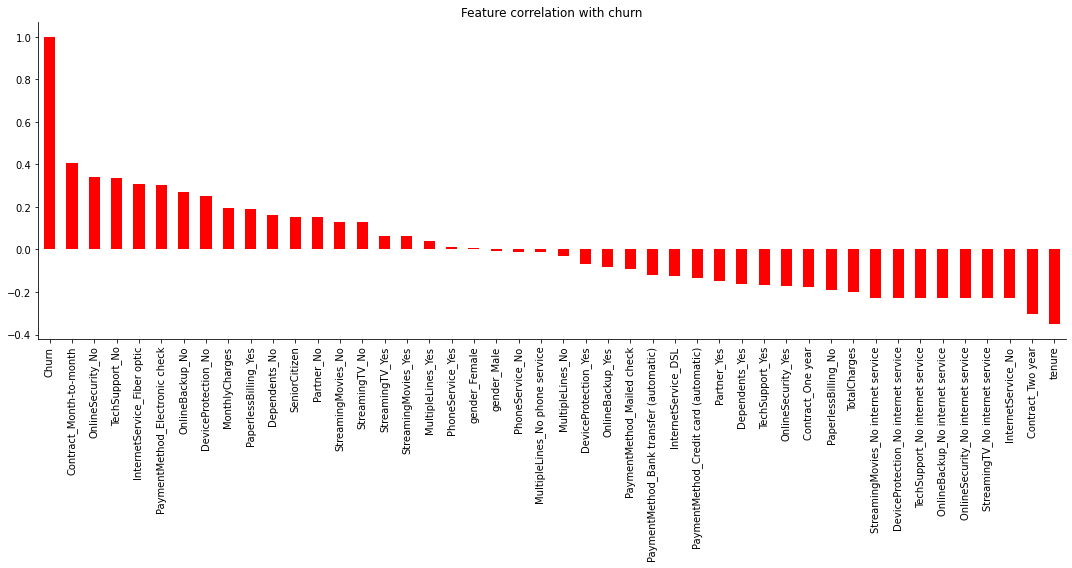

In [13]:
#plot correlations between target feature (churn) and all other variables
fig = plt.figure(figsize = (15,8))
ax = plt.subplot()
telco_dummy.corr()['Churn'].sort_values(ascending = False).plot('bar', color = 'red')
plt.title('Feature correlation with churn', fontsize = 12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.tight_layout()
plt.savefig('churn_correlation')

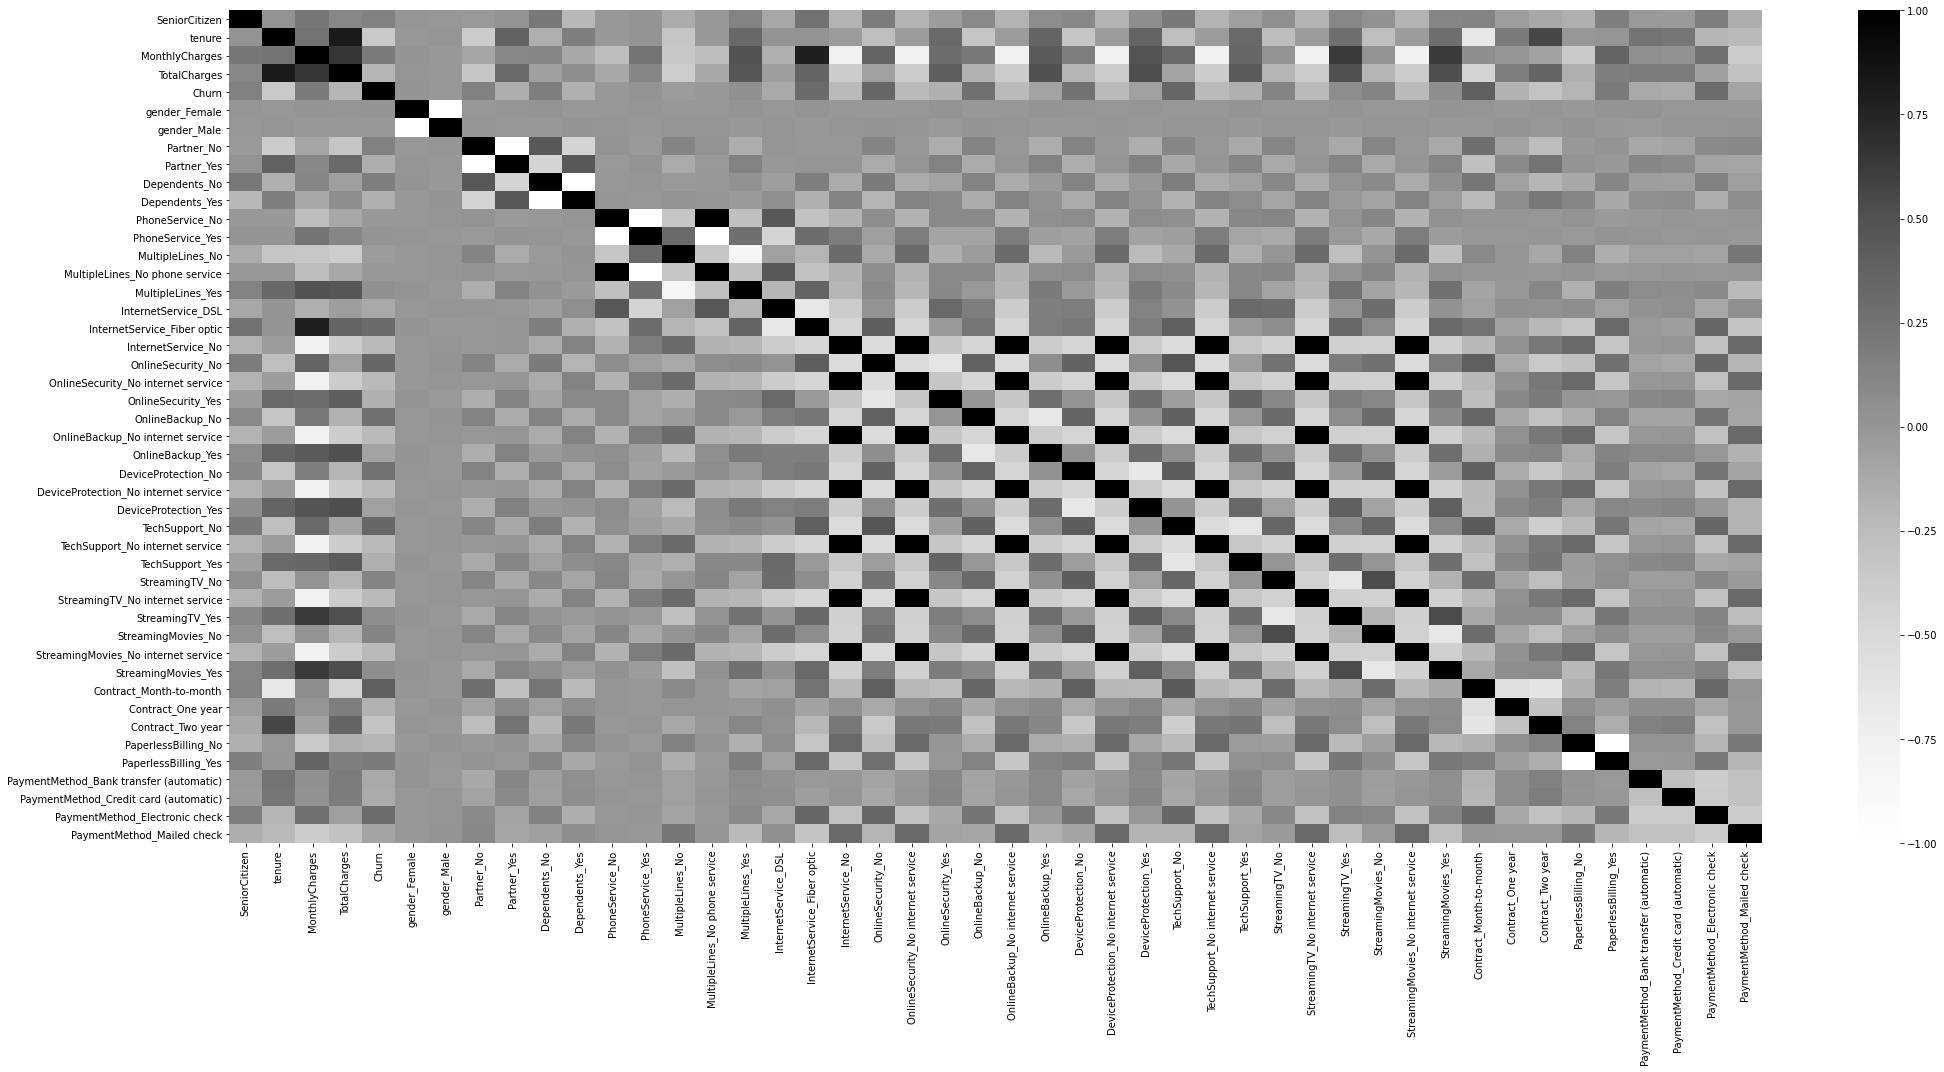

In [14]:
#plotting correlations on a heatmap
fig, ax = plt.subplots(figsize = (30,15))
sns.heatmap(telco_dummy.corr(), cmap = 'Greys')
plt.tight_layout()
plt.savefig('heatmap')

In [15]:
#splitting the data into independent and dependent variables. Dependent variable - value we are trying to predict is churn.
#The independent variables are all other features in the dataset so splitting these into two tables below

y = telco_dummy.Churn.values

X = telco_dummy.drop('Churn', axis = 1)

#saving the X value columns to a separate list for reassigning after scaling the data
telco_columns = X.columns 

In [16]:
#categorical variables are now scaled but also need to scale the numerical variables, e.g. total changes, monthly charges
#instantiate the MinMaxScaler
scaler = MinMaxScaler()

#fit the scaler to the X to transform the data. Converting to dataframe as well - otherwise it would be a NumPy array
X = pd.DataFrame(scaler.fit_transform(X))

#reassign the column names
X.columns = telco_columns
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.013889,0.115423,0.003437,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.472222,0.385075,0.217564,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.027778,0.354229,0.012453,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.625000,0.239303,0.211951,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.027778,0.521891,0.017462,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [17]:
#splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [18]:
#checking shape of training and testing sets - all 7043 records are there
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (5634, 45)
X_test shape: (1409, 45)
y_train shape: (5634,)
y_test shape: (1409,)


In [19]:
#fitting the model. Liblinear is and algorithim which will help optimise the results. Different solvers can be used but
#liblinear is good when the dataset is smaller
logistic_model = LogisticRegression(solver = 'liblinear')
logistic_model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [20]:
#predicting the churn values for X_train and X_test
y_pred_train = logistic_model.predict(X_train)
y_pred_test = logistic_model.predict(X_test)

In [21]:
#evaluating the model - finding the residual differences between train data and predicted train data
residuals = np.abs(y_train - y_pred_train)

#print value counts of predicted values
print(pd.Series(residuals).value_counts())

print('')

#print normalised value counts for predicted values - 80% of churn predictions were correct on the train data set
print(pd.Series(residuals).value_counts(normalize = True))

0    4513
1    1121
dtype: int64

0    0.801029
1    0.198971
dtype: float64


In [22]:
#evaluating the model for the test data - finding the residual differences between test data and predicted test data
residuals_test = np.abs(y_test - y_pred_test)

#print value counts of predicted values
print(pd.Series(residuals_test).value_counts())

print('')

#print normalised value counts for predicted values - 82% of churn predictions were correct on the test data set
print(pd.Series(residuals_test).value_counts(normalize = True))

0    1157
1     252
dtype: int64

0    0.82115
1    0.17885
dtype: float64


In [23]:
#definitions
#precision - how precise the predictions are or TP / (TP + FP). (Out of the times the model said the customer would churn, how
#many times did they actually churn)

#recall - what percentage of the class we're interested in were captured by the model or TP / (TP + FN). (Out of all the 
#customers that churned, what percentage did the model predict as 'going to churn')

#accuracy - measures what percentage of predictions the model got right or (TP + TN) / (TP + FP + TN + FN). 

#F1 score - harmonic mean of precision and recall - can't have a high F1 score without a strong model underneath. 
#F1 = 2(precision * recall) / (precision + recall)
#F1 score penalises model heavily if it's skewed towards precison or recall

In [24]:
#printing the confusion matrix - we are trying to limit false negatives (i.e. when we predict a customer will not churn
#but they do). When trying to limit false negatives we want to optimise on recall rather than precision

#222 = true positive, 935 = true negative, 151 = false negative, 101 = false positive
matrix = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix \n', matrix)

Confusion matrix 
 [[935 101]
 [151 222]]


In [25]:
#visualising the confusion matrix with labels
y_test_df = pd.Series(y_test)
y_pred_test_df = pd.Series(y_pred_test)

pd.crosstab(y_test_df, y_pred_test_df, rownames = ['True'], colnames = ['Predicted'], margins = True).reset_index()

Predicted,True,0,1,All
0,0,935,101,1036
1,1,151,222,373
2,All,1086,323,1409


In [26]:
#concatenating the series into a dataframe and adding a new row to describe what the result is in each. The function uses
#if statements to define the result

results = pd.concat([y_test_df, y_pred_test_df], axis = 1).rename(columns = {0: 'actual', 1: 'prediction'})

def regression_results(row):
    if row['actual'] == 1 and row['prediction'] == 1:
        return 'actual = churn and prediction = churn - True positive'
    if row['actual'] == 0 and row['prediction'] == 0:
        return 'actual = no churn and prediction =  no churn - True negative'
    if row['actual'] == 0 and row['prediction'] == 1:
        return 'actual = no churn but prediction = churn - False positive'
    if row['actual'] == 1 and row['prediction'] == 0:
        return 'actual = churn but prediction = no churn - False negative'

#applying the above function to a new row    
results['result'] = results.apply(lambda row: regression_results(row), axis = 1)
print(results.head())

   actual  prediction                                             result
0       1           1  actual = churn and prediction = churn - True p...
1       0           0  actual = no churn and prediction =  no churn -...
2       0           0  actual = no churn and prediction =  no churn -...
3       1           1  actual = churn and prediction = churn - True p...
4       0           0  actual = no churn and prediction =  no churn -...


In [27]:
#grouping the results to compare with the confustion matrix
results_grouped = results.groupby('result').size()
results_grouped

result
actual = churn and prediction = churn - True positive           222
actual = churn but prediction = no churn - False negative       151
actual = no churn and prediction =  no churn - True negative    935
actual = no churn but prediction = churn - False positive       101
dtype: int64

In [28]:
#printing out the scores for precision, recall, accuracy and F1 for y_test and y_pred_test
print(metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



In [29]:
#another way to print the scores, pos_label tells sklearn what class you want to print - we want 1 as that's the 'will 
#churn' class

precision_train = precision_score(y_train, y_pred_train, pos_label = 1)
precision_test = precision_score(y_test, y_pred_test, pos_label = 1)

recall_train = recall_score(y_train, y_pred_train, pos_label = 1)
recall_test = recall_score(y_test, y_pred_test, pos_label = 1)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

f1_train = f1_score(y_train, y_pred_train, pos_label = 1)
f1_test = f1_score(y_test, y_pred_test, pos_label = 1)

print('Precision train: ', round(precision_train, 2))
print('Precision test: ', round(precision_test, 2))
print('')
print('Recall train: ', round(recall_train, 2))
print('Recall test: ', round(recall_test, 2))
print('')
print('Accuracy train: ', round(accuracy_train, 2))
print('Accuracy test: ', round(accuracy_test, 2))
print('')
print('F1 train: ', round(f1_train, 2))
print('F1 test: ', round(f1_test, 2))
print('')

Precision train:  0.65
Precision test:  0.69

Recall train:  0.54
Recall test:  0.6

Accuracy train:  0.8
Accuracy test:  0.82

F1 train:  0.59
F1 test:  0.64



In [30]:
#calculating probabilities scores for test and train sets
prob_train = logistic_model.predict_proba(X_train)
prob_test = logistic_model.predict_proba(X_test)

#keeping probabilities for positive outcome only (the threshold is 0.5 which means, if the predicted probability of the 
#class for an instance is less than 0.5, that instance is predicted to be in class 0 (the negative class). If the 
#probability of the class for an instance is equal or greater than 0.5, the instance is classified as class 1.)
prob_train_churn = prob_train[:, 1]
prob_test_churn = prob_test[:, 1]

#calculate false positive rate (fpr), true positive rate (tpr) and thresholds for train set
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, prob_train_churn)

#calculate false positive rate (fpr), true positive rate (tpr) and thresholds for test set
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, prob_test_churn)

In [31]:
#calculating AUC (Area Under Curve) - this gives a single numeric metric to evaluate the model. An AUC value of 1 would 
#represent a perfect classifier. If AUC = 0.5 the classifier only has 50% preision. AUC scores above 0.8 so pretty good.

auc_train = auc(train_fpr, train_tpr)
auc_test = auc(test_fpr, test_tpr)
print('Training AUC: ', round(auc_train, 2))
print('Testing AUC: ', round(auc_test, 2))

Training AUC:  0.84
Testing AUC:  0.86


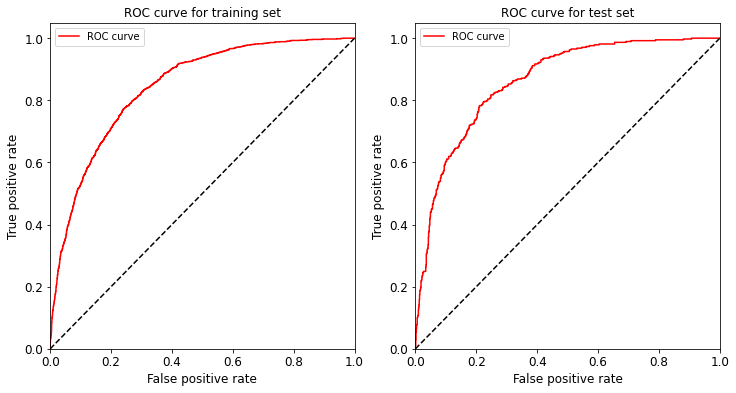

In [32]:
#plotting an ROC (Receiver Operator Characteristic) curve to evaluate the model performance visually. It illustrates the
#true positive rate against the false positive rate of our classifier. Best performing models will have an ROC curve that 
#hugs the upper left corner of the graph. This would represent that we correctly classify the positives much more often 
#than we incorrectly classify them. 

fig = plt.figure(figsize = (12, 6))
ax = plt.subplot(1, 2, 1)
plt.plot(train_fpr, train_tpr, label = 'ROC curve', color = 'red')

#plotting diagonal line from zero which represents a model that guesses incorrectly for every correct guess
plt.plot([0, 1], [0, 1], color = 'black', linestyle = 'dashed')
plt.xlim([0, 1])
plt.ylim([0, 1.05])

plt.legend()
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('False positive rate', fontsize = 12)
plt.ylabel('True positive rate', fontsize = 12)
plt.title('ROC curve for training set', fontsize = 12)

ax = plt.subplot(1, 2, 2)
plt.plot(test_fpr, test_tpr, label = 'ROC curve', color = 'red')

#plotting diagonal line from zero which represents a model that guesses incorrectly for every correct guess
plt.plot([0, 1], [0, 1], color = 'black', linestyle = 'dashed')
plt.xlim([0, 1])
plt.ylim([0, 1.05])

plt.legend()
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('False positive rate', fontsize = 12)
plt.ylabel('True positive rate', fontsize = 12)
plt.title('ROC curve for test set', fontsize = 12)
plt.savefig('ROC_curves')

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few tre

1 trees
Accuracy:  0.72790202342918

2 trees
Accuracy:  0.7287894923677671

3 trees
Accuracy:  0.7312744053958111

4 trees
Accuracy:  0.7326943556975506

5 trees
Accuracy:  0.7380191693290735



/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


15 trees
Accuracy:  0.760915867944622



/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


20 trees
Accuracy:  0.762158324458644

25 trees
Accuracy:  0.7692580759673412

40 trees
Accuracy:  0.776180333688321

50 trees
Accuracy:  0.7776002839900603

70 trees
Accuracy:  0.7802626908058218

100 trees
Accuracy:  0.7777777777777778



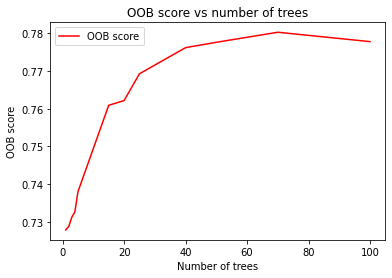

In [33]:
#putting the data through a random forest classifier model to see if that improves the results. Generally, more trees in
#the model are better so the below code will test the model with varying number of trees

#the oob score is a measure of accuracy

oob_results = []
n_estimators = [1, 2, 3, 4, 5, 15, 20, 25, 40, 50, 70, 100]

for trees in n_estimators:
    random_model = RandomForestClassifier(trees, oob_score = True, random_state = 42)
    random_model.fit(X_train, y_train)
    print(trees, 'trees')
    accuracy = random_model.oob_score_
    print('Accuracy: ', accuracy)
    oob_results.append(accuracy)
    print('')

#plotting the oob scores on a chart. The highest accuracy is at 70 trees so will use that in the model
plt.plot(n_estimators, oob_results, color = 'red', label = 'OOB score')
plt.xlabel('Number of trees')
plt.ylabel('OOB score')
plt.title('OOB score vs number of trees')
plt.legend()

In [34]:
#fitting the model with 70 tress
random_model = RandomForestClassifier(n_estimators = 70, random_state = 42)
random_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=70, random_state=42)

In [35]:
#predicting the churn values for X_train and X_test
y_pred_train = random_model.predict(X_train)
y_pred_test = random_model.predict(X_test)

In [36]:
#evaluating the model - finding the residual differences between train data and predicted train data
random_residuals = np.abs(y_train - y_pred_train)

#print value counts of predicted values
print(pd.Series(random_residuals).value_counts())

print('')

#print normalised value counts for predicted values - 99% of churn predictions were correct on the train data set
print(pd.Series(random_residuals).value_counts(normalize = True))

0    5624
1      10
dtype: int64

0    0.998225
1    0.001775
dtype: float64


In [37]:
#evaluating the model for the test data - finding the residual differences between test data and predicted test data
random_residuals_test = np.abs(y_test - y_pred_test)

#print value counts of predicted values
print(pd.Series(random_residuals_test).value_counts())

print('')

#print normalised value counts for predicted values - 79% of churn predictions were correct on the test data set compared
#to 82% with the logisitc regression model
print(pd.Series(random_residuals_test).value_counts(normalize = True))

0    1114
1     295
dtype: int64

0    0.790632
1    0.209368
dtype: float64


In [38]:
#printing the confusion matrix 

#172 = true positive, 942 = true negative, 201 = false negative, 94 = false positive
#the random forest model gives more false negatives compared to the logistic regression model which gave 151
random_matrix = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix \n', random_matrix)

Confusion matrix 
 [[942  94]
 [201 172]]


In [39]:
#printing out the scores for precision, recall, accuracy and F1 for y_test and y_pred_test - recall (which we are trying to 
#optimise is only 0.46 when predicting churn compared to 0.60 in the logistic regression model)
print(metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1036
           1       0.65      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



In [40]:
#checking feature importance in the model - total charges and tenure had the most weight
feature_importance = pd.Series(random_model.feature_importances_, index = X.columns)
feature_importance.sort_values(ascending = False, inplace = True)
print(feature_importance)

TotalCharges                               0.165749
tenure                                     0.140739
MonthlyCharges                             0.137544
Contract_Month-to-month                    0.043832
OnlineSecurity_No                          0.033858
PaymentMethod_Electronic check             0.032320
InternetService_Fiber optic                0.026948
TechSupport_No                             0.024542
SeniorCitizen                              0.019403
gender_Male                                0.018583
Contract_Two year                          0.018358
OnlineBackup_No                            0.018308
gender_Female                              0.017902
PaperlessBilling_No                        0.016041
Partner_Yes                                0.015140
Partner_No                                 0.015054
PaperlessBilling_Yes                       0.014824
MultipleLines_No                           0.013329
OnlineBackup_Yes                           0.013261
DeviceProtec